In [84]:
import math 
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
#--------------------------------------------------------------------------------
class XVector(object):
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
class YVector(object):
    def __init__(self, y1):
        self.y1 = y1  
#-------------------------LA DERIVE DONNEE --------------------------------------
def f(X):
    return (X.x1-2)**2+(X.x2-3)**2
def df(X):
    return 2*(X.x1-2) , 2*(X.x2-3) #composantes du gradient : df/dx , df/dy

def descente1(f, df, X, alpha=1e-2, eps=1e-6, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f
    # x,y sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    
    gradx1, gradx2 = df(X)
    grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient (math.sqrt est la racine carrée)
    i=0
        
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((f(X), 0))
    
    while abs(grad)>eps: # tant que la pente n'est pas approximativement nulle
        gradx1, gradx2 = df(X) # on calcule la pente
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon y
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((f(X), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory

#----------------------DERIVE NON DONNEE-------------------------------------------------------
def g(x1,x2):
    return (x1-2)**2+(x2-3)**2

def descente2(g, X, alpha=1e-2, eps=1e-6, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient avec dérivée numérique
    # x,y sont les valeurs initiales
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/1000000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)    
    
    grad = 1
    i=0
    
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((g(X.x1, X.x2), 0))
    
    while abs(grad)>eps:
        gradx1 = (g(X.x1+eps,X.x2)-g(X.x1-eps,X.x2))/(2*eps) #approximation numérique de la dérivée df/dx
        gradx2 = (g(X.x1, X.x2+eps)-g(X.x1, X.x2-eps))/(2*eps) #approximation numérique de la dérivée df/dy
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon y
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((g(X.x1, X.x2), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory



In [85]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)
#------------------------------- Descente1--------------------------------------------
print("------------Descente1-------------")
X, fX = descente1(f, df, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   fX    -------------")
print("----------------------------------")
print(fX)


------------Descente1-------------
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                0.0                 0.0     0
               0.04                0.06     1
0.07919999999999999 0.11879999999999999     2
           0.117616            0.176424     3
0.15526368000000002          0.23289552     4
       0.1921584064        0.2882376096     5
     0.228315238272      0.342472857408     6
0.26374893350656003    0.39562340025984     7
0.29847395483642886  0.4477109322546432     8
0.33250447573970027  0.4987567136095503     9
                ...                 ...   ...
 1.9999996697928253  2.9999995046892374   773
 1.9999996763969687  2.9999995145954528   774
 1.9999996828690294  2.9999995243035436   775
 1.9999996892116487  2.9999995338174728   776
 1.9999996954274157  2.9999995431411235   777
 1.9999997015188675   2.999999552278301   778
   1.99999970748849  

In [86]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)

In [87]:
#------------------------------- Descente2--------------------------------------------
print("------------Descente2-------------")
X, gX = descente2(g, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   gX    -------------")
print("----------------------------------")
print(gX)


------------Descente2-------------
------------    X    -------------
----------------------------------
         x1                   x2         ETAPE
-------------------- ------------------- -----
                 0.0                 0.0     0
0.039999999996709334 0.06000000000838668     1
 0.07919999999828065 0.11880000001518454     2
 0.11761599998827421 0.17642400003126113     3
  0.1552636799839746 0.23289552003369351     4
 0.19215840638686643 0.28823760963803124     5
  0.2283152382531739  0.3424728574508151     6
  0.2637489334844645  0.3956234003066328     7
 0.29847395481397143  0.4477109323008932     8
 0.33250447572186204  0.4987567136627291     9
                 ...                 ...   ...
  1.9999996697928248  2.9999995046892383   773
  1.9999996763969683  2.9999995145954537   774
   1.999999682869029  2.9999995243035444   775
  1.9999996892116483  2.9999995338174736   776
  1.9999996954274153  2.9999995431411244   777
   1.999999701518867   2.999999552278302   778
  

In [88]:
#----------------------test f1 et f2-------------------------------------------------------
def f1(x1,x2):
    return (((x1)**2)+(2*(x2)**2)+(x1*x2)+x1-x2+30)

#--------------------        Descente2 de f1     -----------------------------------
X = XVector(3, 3)
print("------------Descente2-------------")
X, f1X = descente2(f1, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f1(X)    -------------")
print("----------------------------------")
print(f1X)

------------Descente2-------------
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                3.0                 3.0     0
  2.900000000039313  2.8599999999271404     1
  2.803400000075726    2.72659999986746     2
  2.710066000098152   2.599501999902884     3
  2.619869660101301  2.4784212599086004     4
 2.5326880542378944   2.363085712893451     5
 2.4484034360553437   2.253235403777751     6
  2.366903013324759  2.1486219532177415     7
 2.2880787334925685   2.049008044949005     8
  2.211827078369197   1.954166935796195     9
                ...                 ...   ...
-0.7142850509219727  0.4285711538257715   941
-0.7142850614380052 0.42857115817784575   942
-0.7142850717941656 0.42857116245886573   943
-0.7142850819904538 0.42857116666883144   944
  -0.71428509202687 0.42857117082550644   945
 -0.714285101903414  0.4285711749111272   946
-0.7142851116023223  

In [128]:
def f2(x1,x2):
    return ((x1)**2+10*(x2)**2)

#--------------------        Descente2 de f2      -----------------------------------
X = XVector(3, 3)
print("------------Descente2-------------")
X, f2X = descente2(f2, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f2(X)    -------------")
print("----------------------------------")
print(f2X)



------------Descente2-------------
------------    X    -------------
----------------------------------
          x1                    x2           ETAPE
--------------------- ---------------------- -----
                  3.0                    3.0     0
   2.9399999999383226      2.399999999880606     1
   2.8811999999048794     1.9199999998135127     2
   2.8235759998976846     1.5359999998735248     3
   2.7671044798863704     1.2287999999286399     4
    2.711762390273151     0.9830399999691792     5
    2.657527142460367      0.786431999973189     6
   2.6043765996045494     0.6291455999799496     7
    2.552289067601407      0.503316479985358     8
   2.5012432862395713    0.40265318399323746     9
                  ...                    ...   ...
5.940774719341636e-07 -5.438712527536157e-23   764
5.821959224954803e-07 -5.438712527536157e-23   765
5.705520040455707e-07 -5.438712527536157e-23   766
5.591409639646594e-07 -5.438712527536157e-23   767
5.479581446853662e-07 -5.438

In [142]:

def f_allY(X):
    tmp = []
    for i in range(len(X[0])):
        tmp.append (f2(X[0][i],X[1][i]))
    return np.array(tmp)

X1max=X[1]['x1']
X1min=X[-1]['x1']
print('X1 MIN     : ',X1min)

X2max=X[1]['x2']
X2min=X[-1]['x2']
print('X2 MIN     : ',X2min)

Ymax=f2X[1]['Y']
Ymin=f2X[-1]['Y']
print('Y  MIN     : ',Ymin)

dom=[X1min,X1max,X2min,X2max]
print(dom)


T2Lignes=[X['x1'], X['x2']]
print(X['x1'])
print(X['x2'])




X1 MIN     :  4.85404547501905e-07
X2 MIN     :  -5.438712527536157e-23
Y  MIN     :  2.356175747355291e-13
[4.85404547501905e-07, 2.9399999999383226, -5.438712527536157e-23, 2.399999999880606]
          x1         
---------------------
                  3.0
   2.9399999999383226
   2.8811999999048794
   2.8235759998976846
   2.7671044798863704
    2.711762390273151
    2.657527142460367
   2.6043765996045494
    2.552289067601407
   2.5012432862395713
                  ...
5.940774719341636e-07
5.821959224954803e-07
5.705520040455707e-07
5.591409639646594e-07
5.479581446853662e-07
5.369989817916589e-07
5.262590021558258e-07
5.157338221127092e-07
 5.05419145670455e-07
4.953107627570459e-07
 4.85404547501905e-07
Length = 775 rows
          x2          
----------------------
                   3.0
     2.399999999880606
    1.9199999998135127
    1.5359999998735248
    1.2287999999286399
    0.9830399999691792
     0.786431999973189
    0.6291455999799496
     0.503316479985358
   0.40

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fun(f,dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrÃ¨te.
    # f : fonction (prenant en entrÃ©e un tableau Ã  2 lignes de points Ã  calculer)
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    x, y = np.linspace(dom[0],dom[1],200), np.linspace(dom[2],dom[3],200)
    x, y = np.meshgrid(x,y)
    z = f(np.array([x.flatten(),y.flatten()])).reshape(x.shape)
    
    # valeur et position du minimum sur la grille:
    imin = np.unravel_index(np.argmin(z),z.shape)
    zmin = z[imin]
    print('valeur du minimum sur la grille : ',zmin)
    xmin, ymin = x[imin], y[imin]
    print('position du minimiseur : (',xmin,',',ymin,')')
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot([xmin,xmin],[ymin,ymin],[0,zmin],marker='o')
    ax.plot_surface(x, y, z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Lignes de niveau')

valeur du minimum sur la grille :  2.356175747355291e-13
position du minimiseur : ( 4.85404547501905e-07 , -5.438712527536157e-23 )


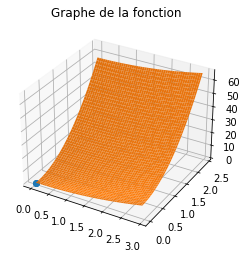

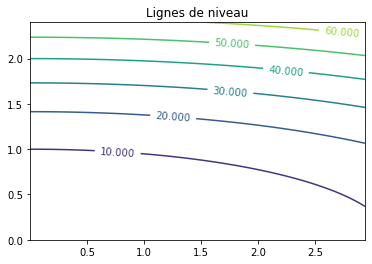

In [144]:
plot_fun(f_allY,dom)
